In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
csv_file_path = "/Users/hwanghyejeong/Documents/boaz/lp-patchnote/user_1_match_10.csv"
df = pd.read_csv(csv_file_path)

In [12]:
encoder = LabelEncoder()
df['role'] = encoder.fit_transform(df['role'])
df['puuid'] = encoder.fit_transform(df['puuid']) 

X = df.drop(['win', 'match_id'], axis=1)  
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


Accuracy: 0.782608695652174
Confusion Matrix:
[[ 7  4]
 [ 1 11]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.64      0.74        11
        True       0.73      0.92      0.81        12

    accuracy                           0.78        23
   macro avg       0.80      0.78      0.78        23
weighted avg       0.80      0.78      0.78        23



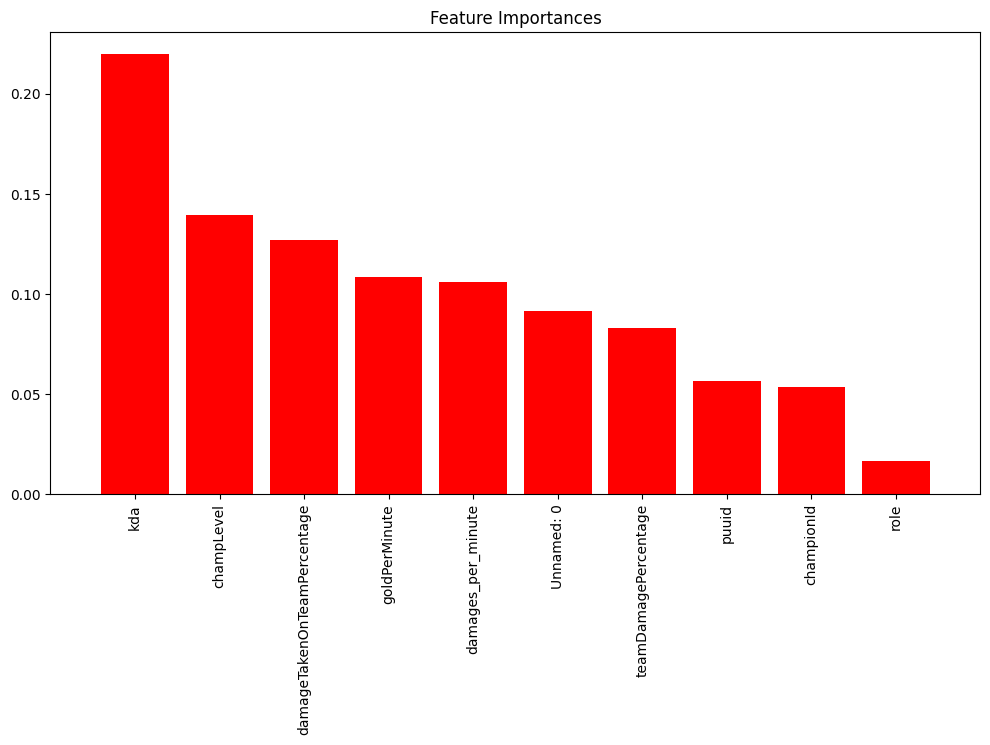

In [14]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
